In [1]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv("house_data.csv")
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045


In [4]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
dtype: int64

NO null values in the given dataset

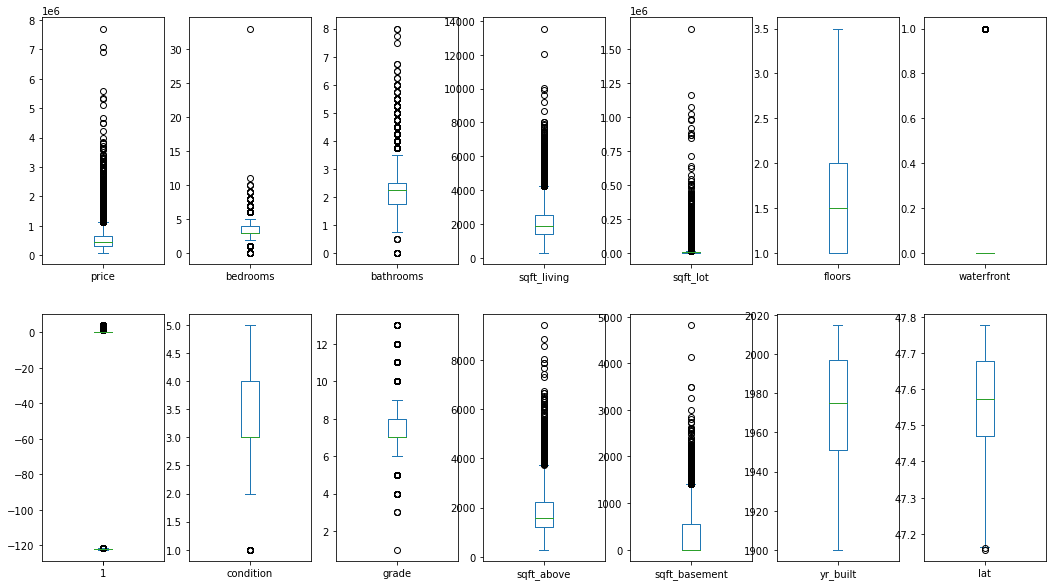

In [5]:
### Checking Outliers

size = data.shape[1]//2

fig,ax = plt.subplots(2,size,figsize=(18,10))

for c,i in enumerate(data.columns):
    try:
        if c >= size:
            data[i].plot(kind='box',ax=ax[1,c%size])
        elif c<= size:
            data[i].plot(kind='box',ax=ax[0,c])
    except Exception as e:
        pass